# Sales Prediction
## ( Simple Linear Regression)

## Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

## Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
advertising = pd.read_csv("https://github.com/justmarkham/scikit-learn-videos/blob/master/data/Advertising.csv?raw=true")
# advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Inspection

In [ ]:
advertising.shape

(200, 5)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [ ]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

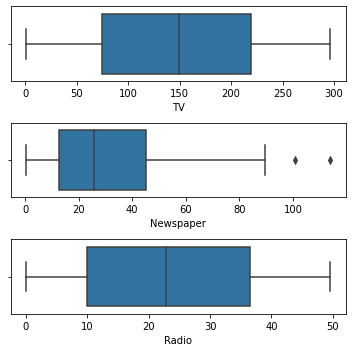

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

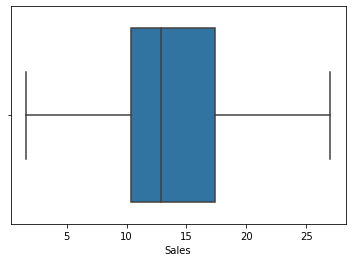

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

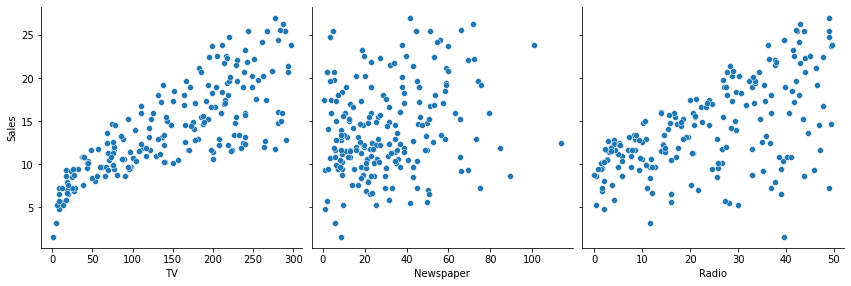

In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

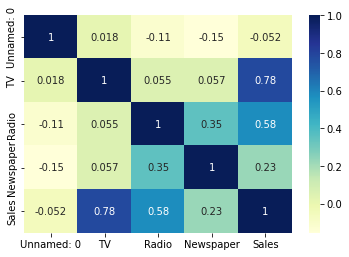

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression


Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

## Method 1 : statsmodels

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [ ]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [ ]:
# Let's now take a look at the train dataset

X_train.head()

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
Name: TV, dtype: float64

In [ ]:
y_train.head()

170     8.4
182     8.7
59     18.4
185    22.6
12      9.2
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [ ]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
c,m = lr.params
print(c,m)

6.74530225122207 0.05024351489327652


In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.64e-32
Time:                        13:31:37   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficient for TV is 0.0502, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

2. R - squared is 0.641
Meaning that 64.1% of the variance in `Sales` is explained by `TV`.
This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.74 + 0.0502 \times TV $

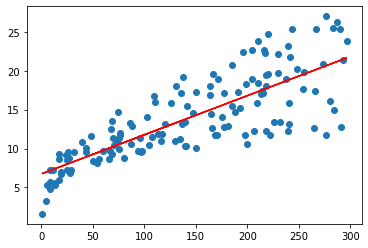

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, c + m*X_train, 'r')
plt.show()

### Model Evaluation

#### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
res

170   -0.857478
182   -0.868988
59     1.068389
185    5.554777
12     1.258902
         ...   
73    -2.246813
144   -0.178728
118    2.839088
189   -0.984856
99     3.661775
Length: 140, dtype: float64

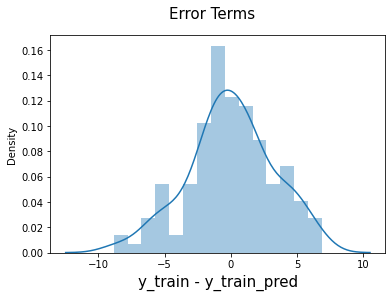

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

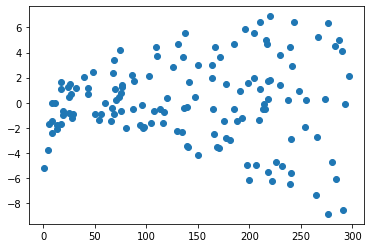

In [ ]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [ ]:
y_test_pred.head()

119     7.720026
77     12.799646
148     8.654556
149     8.991187
154    16.181034
dtype: float64

In [ ]:
res_test = (y_test - y_test_pred)
# res_test

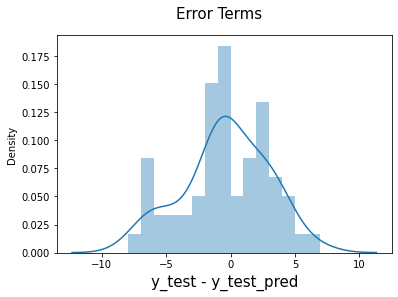

In [ ]:
fig = plt.figure()
sns.distplot(res_test, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

3.289800345756842

##### Checking the R-squared on the test set

In [ ]:
r_sq = r2_score(y_test, y_test_pred)
r_sq

0.5111616978794153

##### Checking the adjusted R-squared on the test set

In [ ]:
n = len(y)
p = 1
adj_R2 = 1-((1-r_sq)*(n-1)/(n-p-1))
print('Adjusted R square :', adj_R2)

Adjusted R square : 0.5086928175656751


##### Visualizing the fit on the test set

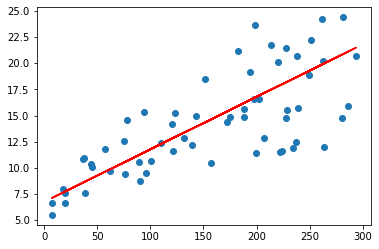

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, c + m * X_test, 'r')
plt.show()

##### Prediction Plot


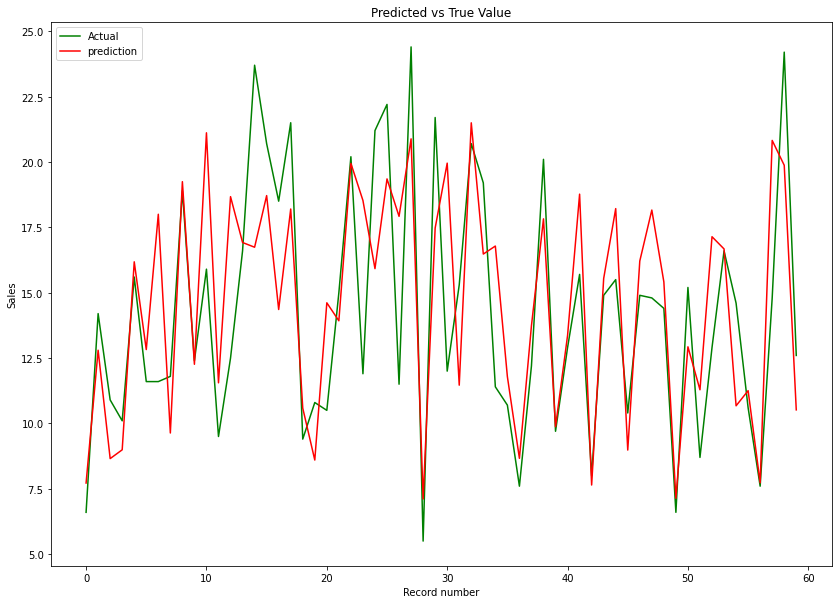

In [109]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(y_test)),y_test_pred, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel("Sales")
plt.show()

## Method 2: linearmodel

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)
X_train

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [ ]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm

array([[ 50. ],
       [ 56.2],
       [210.7],
       [205. ],
       [ 23.8],
       [213.4],
       [141.3],
       [248.4],
       [147.3],
       [136.2],
       [ 31.5],
       [ 43. ],
       [102.7],
       [ 25.6],
       [296.4],
       [109.8],
       [195.4],
       [170.2],
       [ 66.1],
       [197.6],
       [232.1],
       [168.4],
       [266.9],
       [163.3],
       [180.8],
       [289.7],
       [110.7],
       [ 68.4],
       [215.4],
       [ 75.5],
       [239.8],
       [241.7],
       [ 17.2],
       [276.7],
       [ 97.5],
       [280.7],
       [  0.7],
       [ 26.8],
       [ 66.9],
       [218.4],
       [290.7],
       [199.1],
       [116. ],
       [217.7],
       [184.9],
       [ 88.3],
       [ 70.6],
       [140.3],
       [ 53.5],
       [ 80.2],
       [216.8],
       [216.4],
       [ 13.2],
       [149.8],
       [284.3],
       [ 16.9],
       [220.3],
       [ 74.7],
       [287.6],
       [134.3],
       [149.7],
       [131.1],
       [

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [ ]:
print(lm.intercept_)

6.745302251222065


In [ ]:
print(lm.coef_)

[0.05024351]


In [ ]:
y_train_lm_pred = lm.predict(X_train_lm)
y_test_lm_pred = lm.predict(X_test_lm)

In [ ]:
print(r2_score(y_train_lm,y_train_lm_pred))

0.6411433688483876


In [ ]:
print(r2_score(y_test_lm,y_test_lm_pred))

0.5111616978794153


##### Prediction Plot

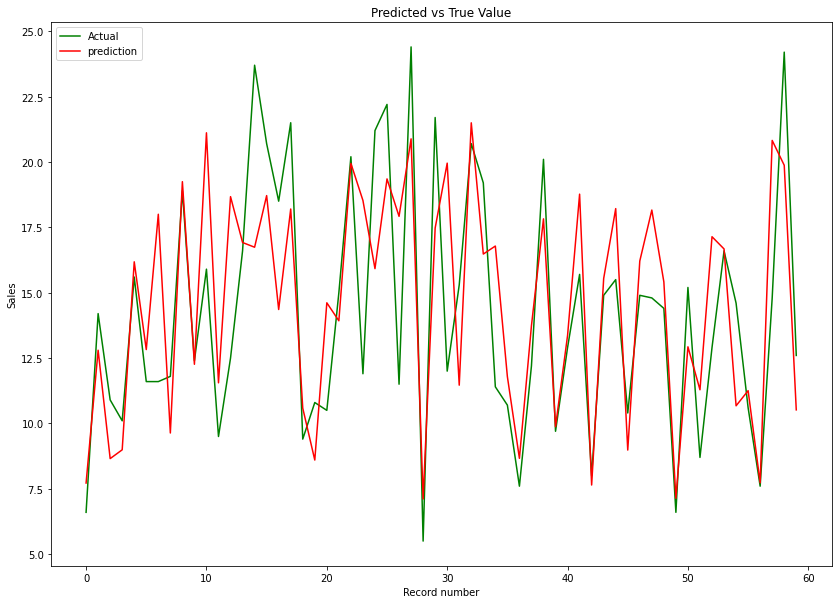

In [110]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(y_test)),y_test_lm_pred, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel("Sales")
plt.show()

In [ ]:
#R2, Adj R2, error matrix for TV+Radio, Radio+Newspaper, TV+Newspaper, TV+Radio+Newspaper
# create X and y
from sklearn import metrics
feature_cols = ['TV', 'Radio', 'Newspaper']
X2 = advertising[feature_cols]
y2 = advertising.Sales

# split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.7, test_size = 0.3, random_state = 5)

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)

# # print the coefficients
# print(list(zip(feature_cols, lm2.coef_)))
# print(lm2.intercept_)
y_train2_pred = lm2.predict(X_train2)
y_test2_pred = lm2.predict(X_test2)

# calculate error matrix, r2, adj r2 on train data
print('Train data stats for TV, Radio, Newspaper')
r_sq2_train = r2_score(y_train2, y_train2_pred)
print('R-squared is : ', r_sq2_train)
n2 = len(y2)
p2 = 3
adj_R2_2_train = 1-((1-r_sq2_train)*(n2-1)/(n2-p2-1))
print('Adjusted R square is :', adj_R2_2_train)
rmse2_train = np.sqrt(mean_squared_error(y_train2, y_train2_pred))
print('root mean square error is : ', rmse2_train)
mse2_train = mean_squared_error(y_train2, y_train2_pred)
print('mean square error is : ', mse2_train)
mae2_train = metrics.mean_absolute_error(y_train2, y_train2_pred)
print('mean absolute error is : ', mae2_train)
print()
print()

# calculate error matrix, r2, adj r2 on test data
print('Test data stats for TV, Radio, Newspaper')
r_sq2_test = r2_score(y_test2, y_test2_pred)
print('R-squared is : ', r_sq2_test)
n2 = len(y2)
p2 = 3
adj_R2_2_test = 1-((1-r_sq2_test)*(n2-1)/(n2-p2-1))
print('Adjusted R square :', adj_R2_2_test)
rmse2_test = np.sqrt(mean_squared_error(y_test2, y_test2_pred))
print('root mean square error is : ', rmse2_test)
mse2_test = mean_squared_error(y_test2, y_test2_pred)
print('mean square error is : ', mse2_test)
mae2_test = metrics.mean_absolute_error(y_test2, y_test2_pred)
print('mean absolute error is : ', mae2_test)

Train data stats for TV, Radio, Newspaper
R-squared is :  0.8997682984995
Adjusted R square is : 0.8982341398030638
root mean square error is :  1.710404614517381
mean square error is :  2.9254839453623505
mean absolute error is :  1.2589088800453594


Test data stats for TV, Radio, Newspaper
R-squared is :  0.8868821951328664
Adjusted R square : 0.8851508001604103
root mean square error is :  1.5825316802028764
mean square error is :  2.5044065188457387
mean absolute error is :  1.2162256013390464


In [ ]:
#1. To see the variable importance through mix of R2 and Adj R2.
#2. To calculate the Evaluation Metrices at one place (R2, Adj R2, RMSE)
#sklearn.metrics.mean_squared_error

In [ ]:
def get_standard_data(data):
    import numpy as np
    m = np.mean(data)
    s = np.std(data)
    return (data-m)/s

In [ ]:
print(advertising['TV'])
print(get_standard_data(advertising['TV']))

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      0.969852
1     -1.197376
2     -1.516155
3      0.052050
4      0.394182
         ...   
195   -1.270941
196   -0.617035
197    0.349810
198    1.594565
199    0.993206
Name: TV, Length: 200, dtype: float64


## Gradiant Descent function

In [ ]:
def grad_descent_loop(data,feature,target,theta,learning_rate,iteration):
    x = data[feature]                      #extracting the independent feature
    m = x.shape[0]                         #no of rows i.e data
    x = get_standard_data(x)               # standardizing the data
    x.insert(0,'constant',np.ones((m,1)))  # inserting column of 1's for the intercept term 
    y = data[target]                       #extracting the dependent or target variable
    cost_list = []                      
    for i in range(iteration):
        y_pred = theta[0] * x.iloc[:,0] + theta[1] * x.iloc[:,1]   # y = c + m*x =  c*x0 + m*x1 = theta0*x0 + theta1*x1
        error = y_pred - y
        cost = 1/(2*m) * sum(error**2)
        cost_list.append(cost)
        theta[0] = theta[0] - learning_rate * 1/m * sum(error * x.iloc[:,0])
        theta[1] = theta[1] - learning_rate * 1/m * sum(error * x.iloc[:,1])
#         print(cost)
    return cost_list,theta

def plot_cost(cost_list,learning_rate):
    plt.plot(range(len(cost_list)),cost_list,label=f'alpha:{learning_rate}')
    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('Cost')

In [ ]:
cost_list, theta = grad_descent_loop(advertising,['TV'], 'Sales',np.zeros(2),0.05,5000)

In [ ]:
theta

array([14.0225    ,  4.07100612])

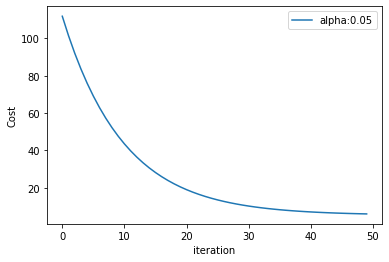

In [ ]:
plot_cost(cost_list,0.05)

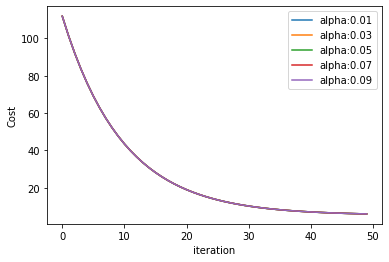

In [ ]:
for alpha in [0.01, 0.03, 0.05, 0.07,0.09]:
    cost_list, theta = grad_descent_loop(advertising,['TV'], 'Sales',np.zeros(2),0.05,50)
    plot_cost(cost_list,alpha)